In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load Model
from keras.models import load_model
from keras.models import model_from_json
model = model_from_json(open("/content/drive/MyDrive/face_reg_dataset/model.json", "r").read())
model.load_weights('/content/drive/MyDrive/face_reg_dataset/model.h5')


In [ ]:
from keras.preprocessing.image import img_to_array
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image


face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
emotion_labels = ['Angry', 'Digust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    allfaces = []   
    rects = []
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        allfaces.append(roi_gray)
        rects.append((x,w,y,h))
    return rects, allfaces, img
def emotion_reg(img):
  rects, faces, image = face_detector(img)
  i = 0
  for face in faces:
    roi = face.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # make a prediction on the ROI, then lookup the class
    preds = model.predict(roi)[0]
    print(preds.max())
    prob = preds.max()
    label = emotion_labels[preds.argmax()]   

    #Overlay our detected emotion on our pic
    label_position = (rects[i][0] + int((rects[i][1]/2)), abs(rects[i][2] - 10))
    i =+ 1
    cv2.putText(image, label +("(%.2f%%)" % (prob * 100)), label_position , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    return image

0.99874926


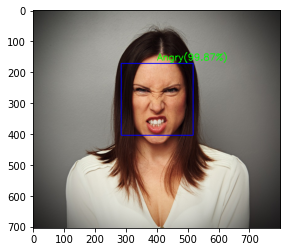

In [ ]:
img = cv2.imread("angry.jpeg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.7745264


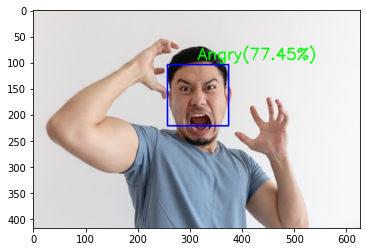

In [ ]:
img = cv2.imread("angry2.jpg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.99837816


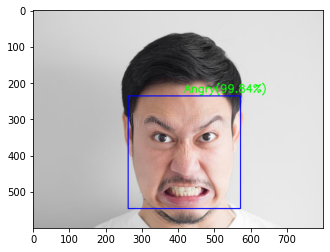

In [ ]:
img = cv2.imread("angry3.jpg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.936673


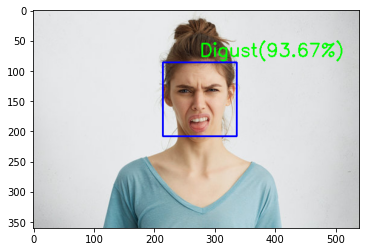

In [ ]:
img = cv2.imread("disgust.jpg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.7507795


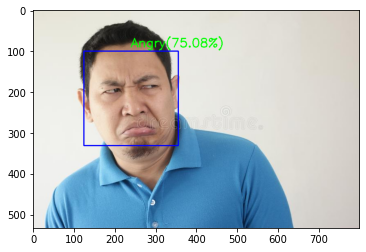

In [ ]:
img = cv2.imread("disgust1.jpg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.48958448


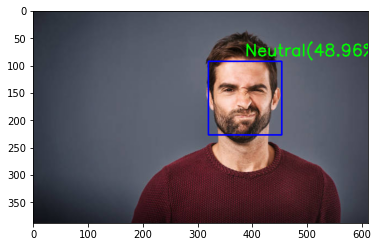

In [ ]:
img = cv2.imread("disgust2.jpg")
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.978745


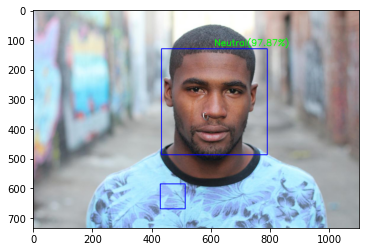

In [ ]:
img = cv2.imread("cry.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.4984947


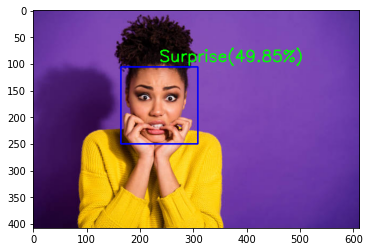

In [ ]:
img = cv2.imread("fear2.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.6922189


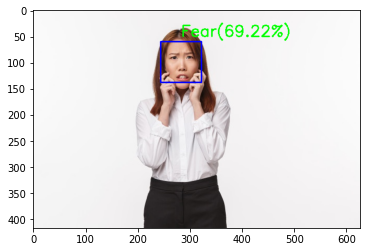

In [ ]:
img = cv2.imread("fear3.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.85003126


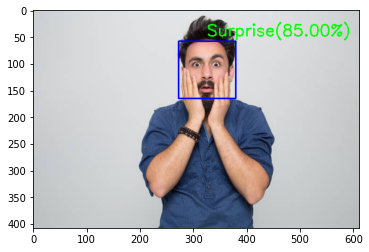

In [ ]:
img = cv2.imread("fear.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.5703061


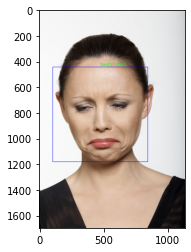

In [ ]:
img = cv2.imread("sad1.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.95390606


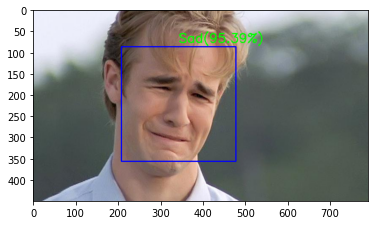

In [ ]:
img = cv2.imread("sadd.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.53946614


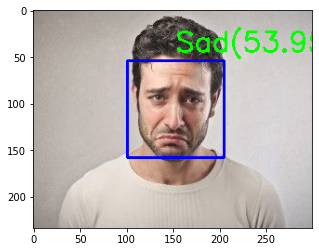

In [ ]:
img = cv2.imread("sad2.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.6346536


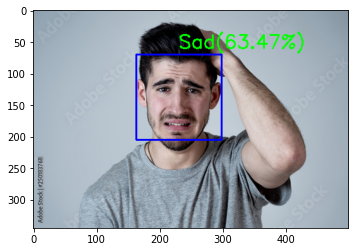

In [ ]:
img = cv2.imread("sad3.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.785323


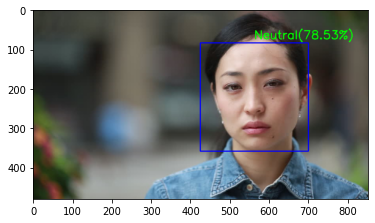

In [ ]:
img = cv2.imread("sad4.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.7466623


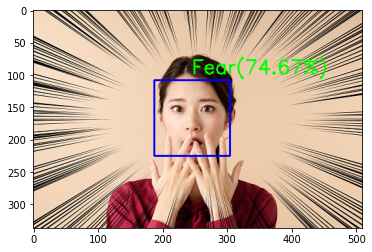

In [ ]:
img = cv2.imread("surprise3.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.9623992


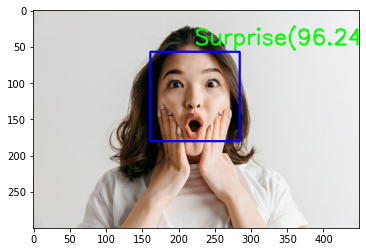

In [ ]:
img = cv2.imread("surprise4.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.9050311


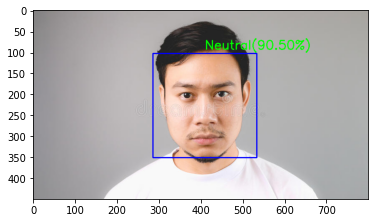

In [ ]:
img = cv2.imread("neutral.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()

0.86800385


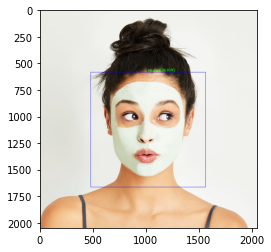

In [ ]:
img = cv2.imread("mask1.jpg")   
plt.imshow(emotion_reg(img)[:,:,::-1])
plt.show()